In [1]:
import numpy  as np
import pandas as pd
from   sklearn.model_selection import train_test_split
from   sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import shap

#%matplotlib notebook

np.random.seed(42)


In [2]:
n = 1000

X = pd.DataFrame({
    'x1': np.random.uniform(140,200, n),
    'x2': np.random.uniform(0,   10, n),
})

y = 0.1 * X.x1 - 1 * X.x2 + 10 * (X.x1 < 160) * (X.x2 > 7) - 8

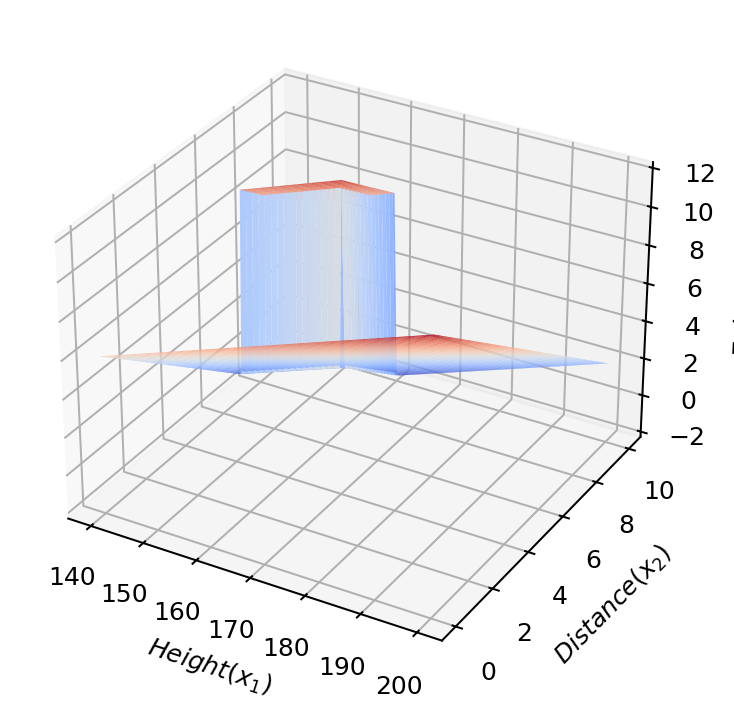

In [3]:
fig = plt.figure(dpi=180)
ax = fig.add_subplot(projection='3d')

#Generate x1 and x2 grids
x1 = np.linspace(140, 200, 100)
x2 = np.linspace(0, 10, 100)
xx1, xx2 = np.meshgrid(x1, x2)
yy  = 0.1 * xx1 - 1 * xx2 + 10 * (xx1 < 160) * (xx2 > 7) - 8

# Plot the surface.
ax.plot_surface(xx1, xx2, yy, cmap=plt.cm.coolwarm)

# Tweak the limits and add latex math labels.

ax.set_xlabel(r'$Height(x_1)$')
ax.set_ylabel(r'$Distance(x_2)$')
ax.set_zlabel(r'$Enjoyment$')
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
#Generate x1 and x2 grids
x1 = np.linspace(140, 200, 100)
x2 = np.linspace(0, 10, 100)
xx1, xx2 = np.meshgrid(x1, x2)
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
colour = rf_model.predict(Xgrid)
colour = colour.reshape(xx1.shape)

/home/aswin/miniconda3/envs/regression/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [8]:
fig = plt.figure()
plt.imshow(colour, extent=[x1.min(), x1.max(), x2.min(), x2.max()], aspect=6, cmap='coolwarm', origin='lower',)
plt.xlabel('Height of fan')
plt.ylabel('Distance to stage')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>

In [9]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

<IPython.core.display.Javascript object>

In [10]:
shap.plots.scatter(shap_values[:,0], color=shap_values[:,1])

<IPython.core.display.Javascript object>

In [16]:
#Creating new data for Mia and Tom
Xnew = pd.DataFrame({'x1':[159, 161], 'x2':[2, 2]})
print("""
Mia:{mia}
Tom:{tom}
Exp:{exp}
""".format(
  mia=round(rf_model.predict(Xnew)[0],2),
  tom=round(rf_model.predict(Xnew)[1],2),
  exp=round(explainer.expected_value[0],2)
))


Mia:5.88
Tom:6.07
Exp:4.86



In [17]:
shap_values = explainer(Xnew)
print('Mia', shap_values[0].values)
print('Tom', shap_values[1].values)

Mia [-0.15944093  1.18150926]
Tom [-1.37794848  2.5913748 ]
